# Assessment Overview
***

On the [keras website](https://keras.io/), there is an example of [time-series anomaly detection](https://keras.io/examples/timeseries/timeseries_anomaly_detection/). Re-create this example in a notebook of your own, explaining the concepts.   

Clearly explain each keras function used, referring to the documentation.   

Include an introduction to your notebook, setting the context and describing what the reader can expect as they read down through the notebook.   

Include a conclusion section where you suggest improvements you could make to the analysis in the notebook.

# Introduction
***

# Evaluation

***

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

In [10]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt

## Data

***

https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

In [11]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [12]:
# Check that the url for the no anomaly csv file is concatonated correctly
no_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [13]:
# Check that the url for the with anomaly csv file is concatonated correctly
with_anomaly_url

'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

In [14]:
# Import the small noise no anomaly csv to a pandas dataframe
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [15]:
# Look at the first five entries of the no anomaly data
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [16]:
# View some summary statistics of the no anomaly data
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [18]:
# View information about the first entry of the no anomaly data
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [19]:
# View the complete value of the first value imported as pandas seems to have rounded the values to 10 decimal places
df_small_noise.iloc[0]['value']

18.3249185392

In [20]:
# Confirming that the first value has been rounded. It was 18.324918539200002 in the original csv
df_small_noise.iloc[0].values[0]

18.3249185392

In [21]:
# Confirming the shape of the output is what's expected
df_small_noise.shape

(4032, 1)

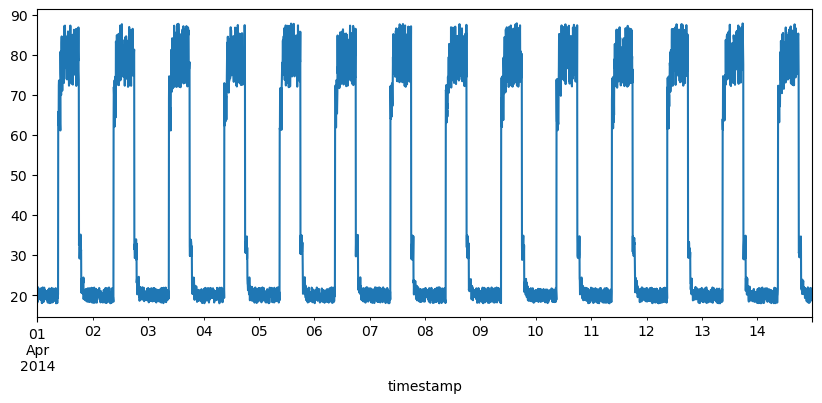

In [22]:
# Specify a size for the plot
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot the no anomaly data frame.
df_small_noise.plot(legend=False, ax=ax);

In [23]:
# Import the daily jumpsup with anomaly csv to a pandas dataframe
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [24]:
# Look at the first five entries of the with anomaly data
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [25]:
# View some summary statistics of the with anomaly data
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [26]:
# View information about the first entry of the with anomaly data
df_daily_jumpsup.iloc[0]['value']

19.761251903

In [27]:
# Confirming the shape of the output is what's expected
df_daily_jumpsup.shape

(4032, 1)

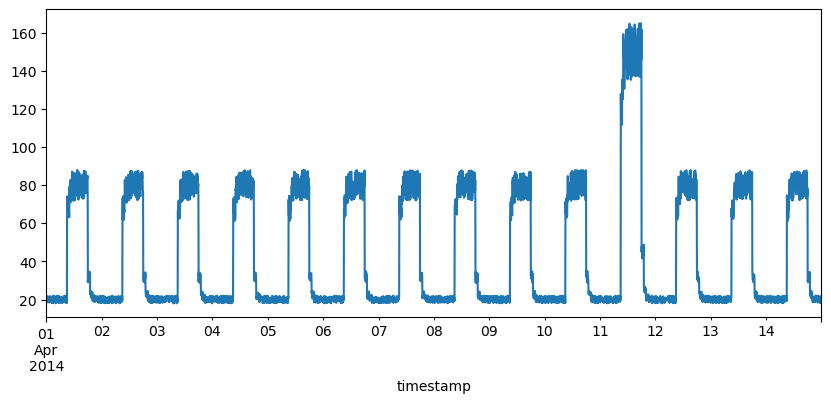

In [28]:
# Specify a size for the plot
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot the with anomaly data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

## Preprocessing

***

In [29]:
# Getting the mean of the values in the no anomaly data
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [30]:
# Getting the standard deviation of the values in the no anomaly data
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

https://statisticsbyjim.com/glossary/standardization/

In [31]:
# Standardising the values
df_train_vals = (df_small_noise - train_mean) / train_std

In [32]:
# Look at the first five entries of the standardised no anomaly data
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


In [33]:
# Add a column to the original no anomaly dataframe with the values of the datapoint minus the mean
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()

# Add a column to the original no anomaly dataframe with standardised values
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

# Show the no anomoly dataframe with the two newly added columns
df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [34]:
# View the mean of the three columns in the no anomaly data 
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [35]:
# View the standard deviation of the three columns in the no anomaly data
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

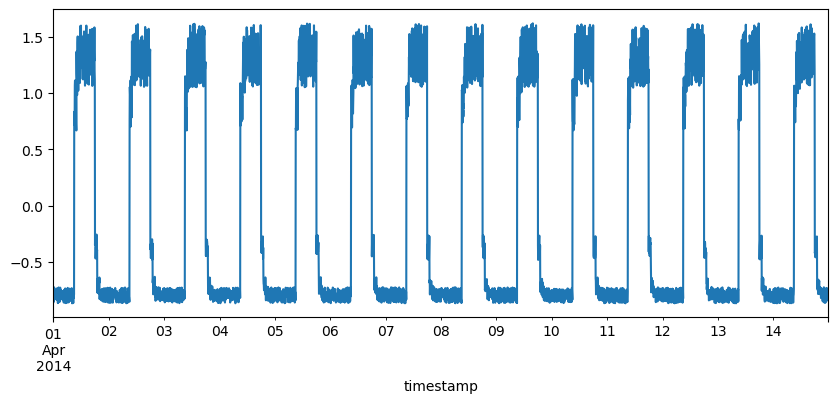

In [36]:
# Specify a size for the plot
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot the standardised no anomaly data frame.
df_train_vals.plot(legend=False, ax=ax);

In [37]:
# Confirming that the shape of the standardised no anomaly data is what we expect
df_train_vals.shape

(4032, 1)

In [38]:
# Specifying the size for the windows
window_size = 288

Window example:

```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
...
```

In [39]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [40]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [41]:
# Remove brackets.
len(L) - win_size + 1

10

In [42]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [43]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [44]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [45]:
# Function to return windowed values of the input data
def windows(vals, N=window_size):
  # Create an empty list to append the windowed data to
  L = []
  # Iterate over the inpuit data for the length of the specified window
  for i in range(len(vals) - N + 1):
    # Append the input data which is the same length as the specified window
    L.append(vals[i:i+N])
  # Stack windows into an array
  return np.stack(L)

In [46]:
# Use the windows function on the standardised no anomaly data
x_train = windows(df_train_vals)

In [47]:
# View the standardised no anomaly data which is now divided into windows
x_train

array([[[-0.85882857],
        [-0.72899302],
        [-0.84814772],
        ...,
        [-0.86453747],
        [-0.81250829],
        [-0.79671155]],

       [[-0.72899302],
        [-0.84814772],
        [-0.72958579],
        ...,
        [-0.81250829],
        [-0.79671155],
        [-0.78767946]],

       [[-0.84814772],
        [-0.72958579],
        [-0.731173  ],
        ...,
        [-0.79671155],
        [-0.78767946],
        [-0.73706287]],

       ...,

       [[-0.8226548 ],
        [-0.86660975],
        [-0.82181363],
        ...,
        [-0.79164661],
        [-0.78025492],
        [-0.83364049]],

       [[-0.86660975],
        [-0.82181363],
        [-0.75595835],
        ...,
        [-0.78025492],
        [-0.83364049],
        [-0.73510213]],

       [[-0.82181363],
        [-0.75595835],
        [-0.74256753],
        ...,
        [-0.83364049],
        [-0.73510213],
        [-0.8460886 ]]])

In [48]:
# Check the first and last entry
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [49]:
# Extra detail about the first and last entry
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [50]:
# Confirming the shape of the windowed no anomaly data
x_train.shape

(3745, 288, 1)

In [51]:
# Check some of the original standardised no anomaly data to see if they match the windowed data
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [52]:
# Flatten and view the data points in the first window 
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

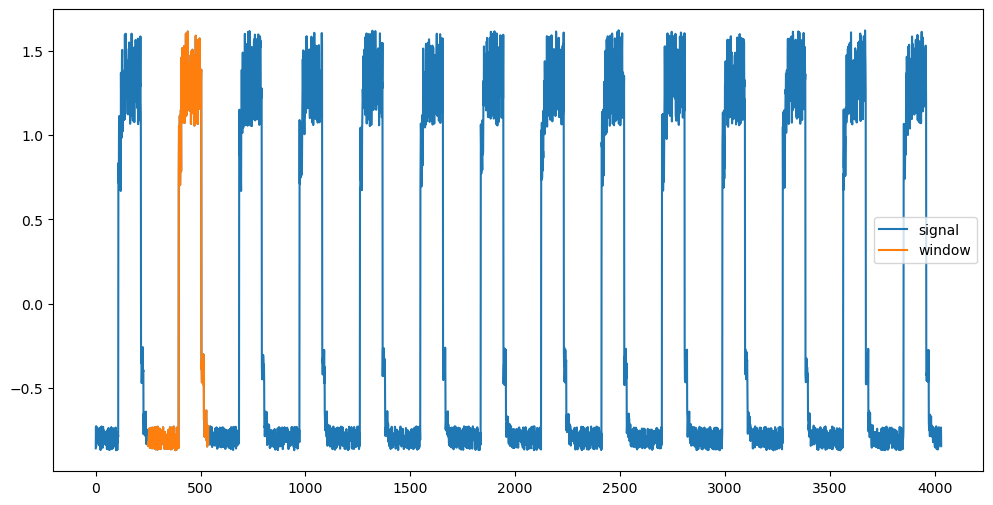

In [53]:
# Select the 250th window
window_no = 250

# Specify a size for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Get the standardised no anomaly data
y = df_train_vals['value'].values

# Plot the standardised no anomaly data
ax.plot(np.arange(y.shape[0]), y, label='signal')

# Get the values contained in the window number specified earlier
w = x_train[window_no].flatten()

# Plot the data from the window specified on top of the standardised no anomaly plot 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')
ax.legend();

## Neural Network

***

In [54]:
# Confirming the shape of the windowed no anomaly data
x_train.shape

(3745, 288, 1)

In [56]:
x_train.shape[2]

1

In [55]:
# Defining the layers for the model
layers = [
  # 
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [56]:
#
model = keras.Sequential(layers)

In [57]:
# 
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [58]:
# 
model.compile(optimizer=optimizer, loss="mse")

In [59]:
#
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 144, 32)           256       
_________________________________________________________________
dropout (Dropout)            (None, 144, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 72, 16)            3600      
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 144, 16)           1808      
_________________________________________________________________
dropout_1 (Dropout)          (None, 144, 16)           0         
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 288, 32)           3616      
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr (None, 288, 1)            2

In [60]:
# 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 109ms/step - loss: 0.6192 - val_loss: 0.0786
Epoch 2/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0946 - val_loss: 0.0476
Epoch 3/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0614 - val_loss: 0.0393
Epoch 4/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0513 - val_loss: 0.0326
Epoch 5/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0440 - val_loss: 0.0300
Epoch 6/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0384 - val_loss: 0.0281
Epoch 7/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0346 - val_loss: 0.0255
Epoch 8/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0311 - val_loss: 0.0243
Epoch 9/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0286 - val_loss: 0.0243
Epoch 10/50
27/27 [==============================] - 2s 82ms/step - loss: 0.0266 - val_loss: 0.0245
Epoch 11

## Evaluation

***

In [61]:
#
history.history["loss"]

[0.6192448139190674,
 0.09461682289838791,
 0.061437174677848816,
 0.051265936344861984,
 0.04399537667632103,
 0.03841288387775421,
 0.034553162753582,
 0.031086986884474754,
 0.02859693579375744,
 0.026578186079859734,
 0.024690601974725723,
 0.023206939920783043,
 0.02181055396795273,
 0.020496228709816933,
 0.019353896379470825,
 0.018204443156719208,
 0.01726231537759304,
 0.016424592584371567,
 0.01560271717607975,
 0.014905553311109543,
 0.01429332047700882,
 0.013623693957924843,
 0.013107147999107838,
 0.01253353152424097,
 0.01194852590560913,
 0.011577999219298363,
 0.01114903949201107,
 0.010746373794972897,
 0.010441048070788383,
 0.010005917400121689,
 0.009734799154102802,
 0.009426819160580635,
 0.009133038111031055,
 0.008854899555444717,
 0.008611587807536125,
 0.00836779922246933,
 0.008094022050499916,
 0.007910131476819515,
 0.00772229814901948,
 0.0075138770043849945,
 0.007355974521487951,
 0.007191887125372887,
 0.007063723169267178,
 0.006929926108568907,
 0.00

In [62]:
#
history.history["val_loss"]

[0.0785750299692154,
 0.047567225992679596,
 0.03931742534041405,
 0.032627105712890625,
 0.030009569600224495,
 0.02808038331568241,
 0.02552635408937931,
 0.02430962584912777,
 0.024281952530145645,
 0.024537693709135056,
 0.024384289979934692,
 0.022844713181257248,
 0.023785822093486786,
 0.022664062678813934,
 0.022280950099229813,
 0.020672393962740898,
 0.02092597633600235,
 0.0204097181558609,
 0.018915371969342232,
 0.0172126442193985,
 0.015668833628296852,
 0.014981461688876152,
 0.014490817673504353,
 0.014231414534151554,
 0.013016094453632832,
 0.012904378585517406,
 0.012141481973230839,
 0.0110270781442523,
 0.010908900760114193,
 0.010265154764056206,
 0.009842338971793652,
 0.009311568923294544,
 0.00919488538056612,
 0.008770735003054142,
 0.00828048586845398,
 0.008365069516003132,
 0.007639561779797077,
 0.007589991670101881,
 0.007362197153270245,
 0.0069713471457362175,
 0.006953664124011993,
 0.00686089089140296,
 0.006713787093758583,
 0.006518431473523378,
 0.

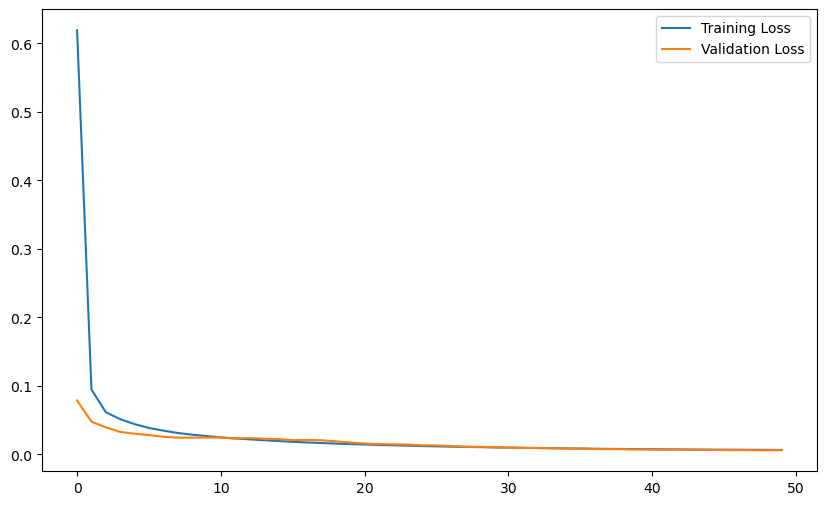

In [63]:
# Specify a size for the plot
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [64]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

In [65]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

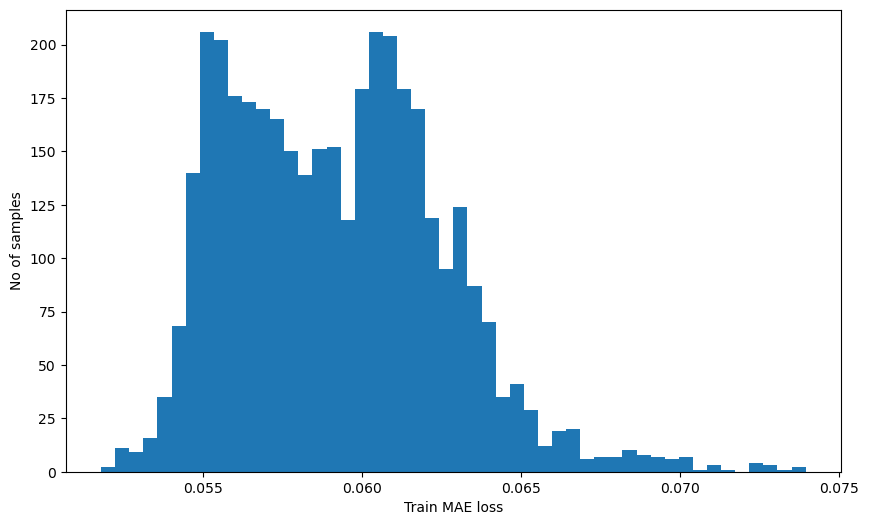

In [66]:
# Specify a size for the plot
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [67]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

0.07394375995959414

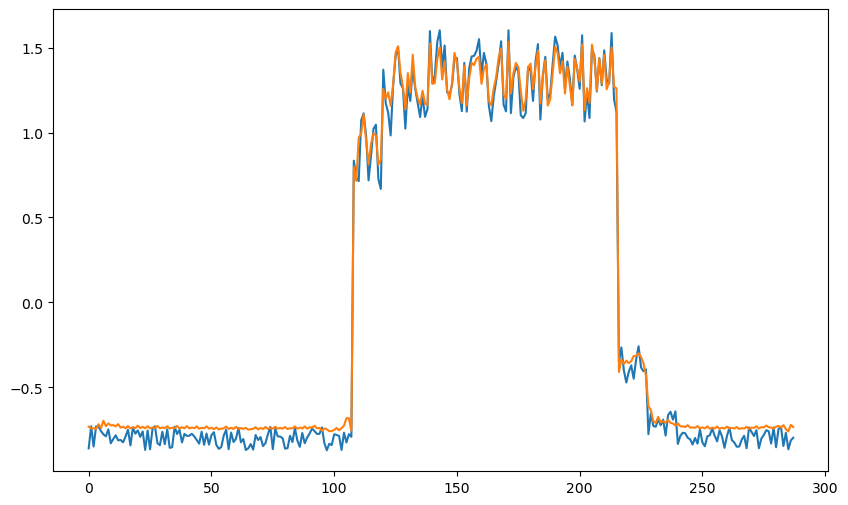

In [68]:
# Specify a size for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [69]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

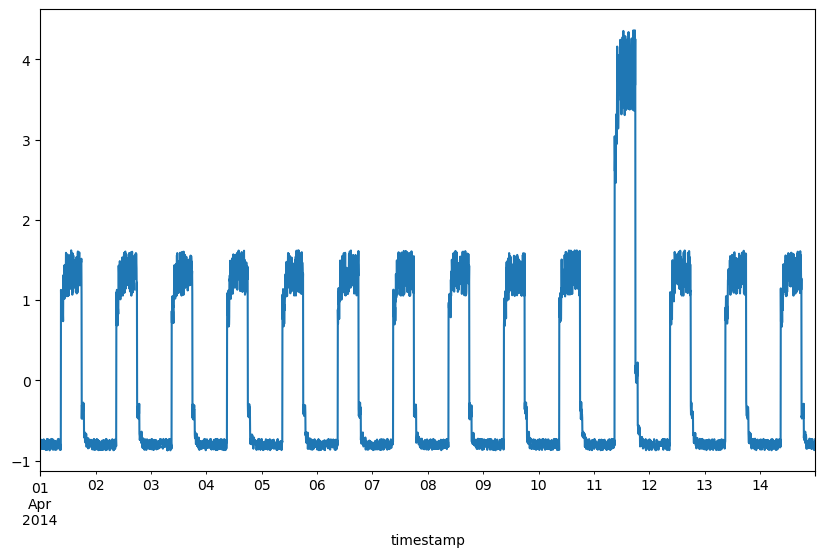

In [70]:
# Specify a size for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [71]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [72]:
# 
x_test_pred = model.predict(x_test)

In [73]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

array([[0.05476703],
       [0.05854297],
       [0.05589814],
       ...,
       [0.06124401],
       [0.05871015],
       [0.06015543]])

In [74]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

array([0.05476703, 0.05854297, 0.05589814, ..., 0.06124401, 0.05871015,
       0.06015543])

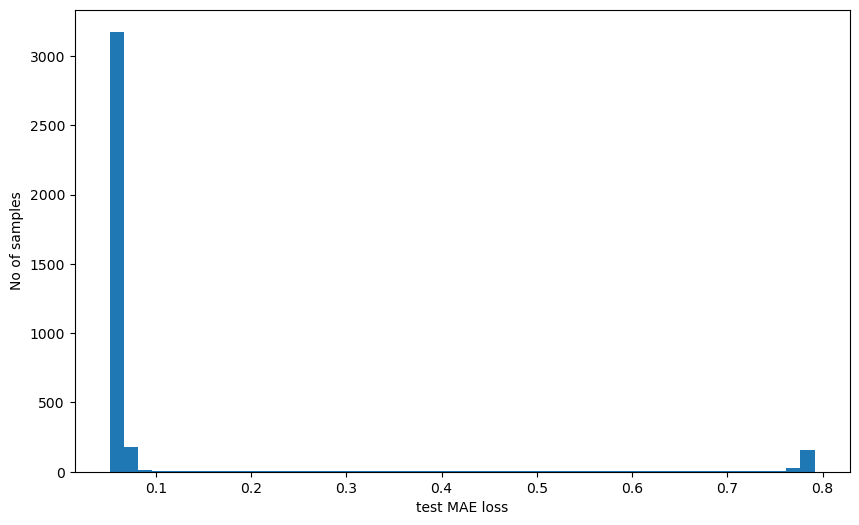

In [75]:
# Specify a size for the plot
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [76]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

403

In [77]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [78]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

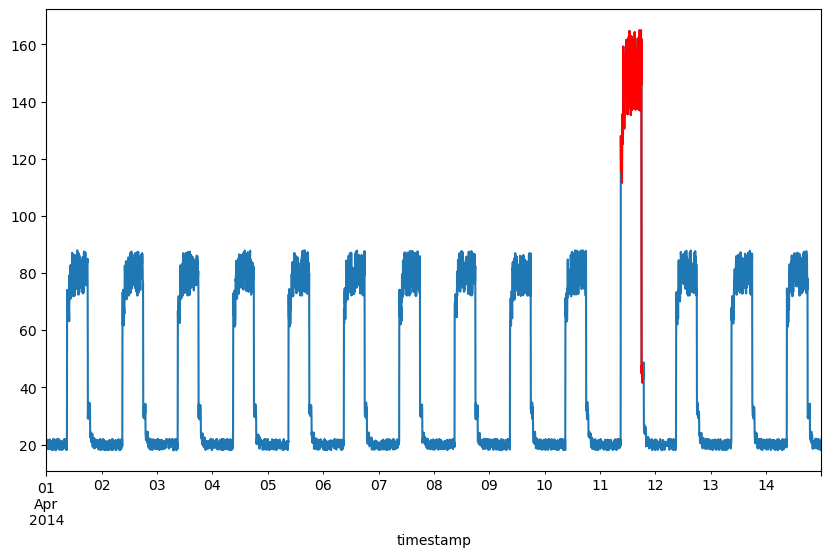

In [79]:
#Specify a size for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

## Conclusion

***

# References
***

https://statisticsbyjim.com/glossary/standardization/

